In [ ]:
Visualization first assignment 

This dataset shows sales transactions from an online retail store in the UK. 
It was originally shared through the UCI Machine Learning Repository and covers purchases made between December 2010 and December 2011.
It’s mostly wholesale orders.


In [59]:
import warnings

warnings.filterwarnings('ignore')

In [61]:
!pip3 install -U ucimlrepo 
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets  

In [63]:
# reading the database
retail = pd.read_csv("Retail.csv")

# printing the top 11 rows
display(retail.head(11))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 08:34,1.69,13047.0,United Kingdom


The bar graph below shows how many of each item was sold in the first 10 rows of the dataset.
It gives a quick look at which products had higher quantities and you can notice which items are more popular.

In [65]:
top_ten =  retail.head(11)
item_sales = top_ten.groupby ('Description')['Quantity'].sum()

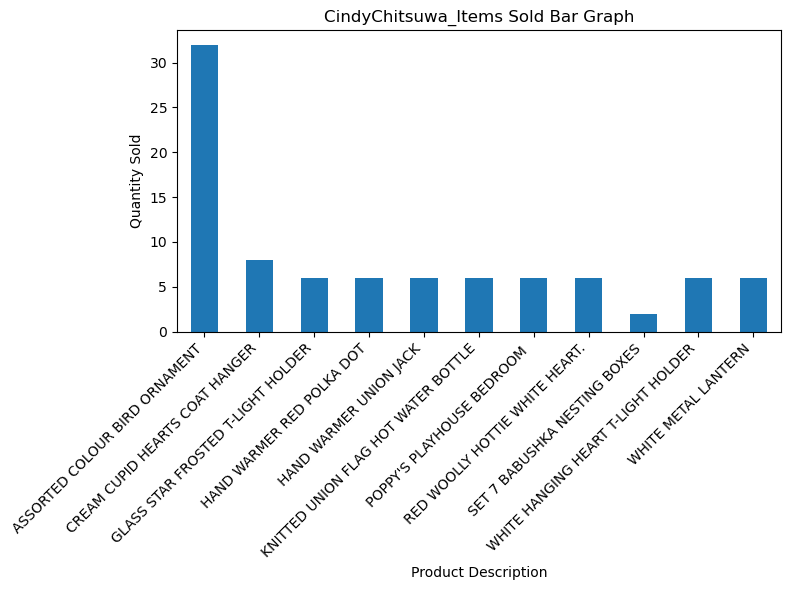

In [66]:
# ---------------------------
# Visualization 1:  bar graph showing how many units of each item were sold
# ---------------------------


plt.figure(figsize=(8,6))
item_sales.plot(kind='bar')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.title('CindyChitsuwa_Items Sold Bar Graph')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the image
plt.savefig('CindyChitsuwa_ItemsSoldBarGraph.png')

plt.show()



The line graph below compares the unit price and quantity sold across the first 10 transactions.If you look at how the values change side by side, we can see that people tend to buy cheaper items in higher quantities, while more expensive items are purchased less.


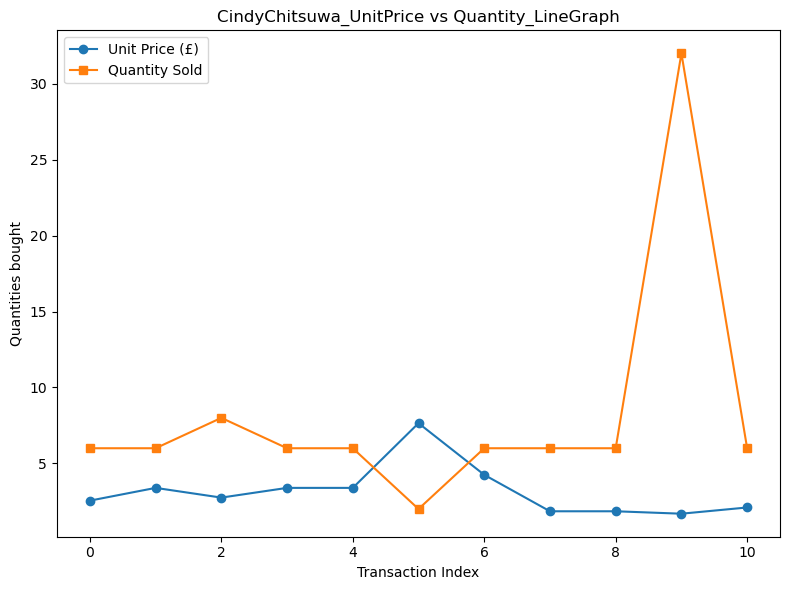

In [69]:
# ---------------------------
# Visualization 2: Line Graph - Unit Price over Time
# ---------------------------

plt.figure(figsize=(8,6))
x_axis = top_ten.index

# Plot Unit Price
plt.plot(x_axis, top_ten['UnitPrice'], marker='o', label='Unit Price (£)')

# Plot Quantity
plt.plot(x_axis, top_ten['Quantity'], marker='s', label='Quantity Sold')

# Labels and title
plt.xlabel('Transaction Index')
plt.ylabel('Quantities bought')
plt.title('CindyChitsuwa_UnitPrice vs Quantity_LineGraph')

plt.legend()
plt.tight_layout()

plt.savefig('CindyChitsuwa_UnitPrice_vs_Quantity_LineGraph.png')
plt.show()

The pie chart below shows the total sales value for each product.
It was calculated by multiplying quantity by unit price to highlight which items brought in the most money. Some products take up more of the chart not because they sold more, but because they were more expensive.

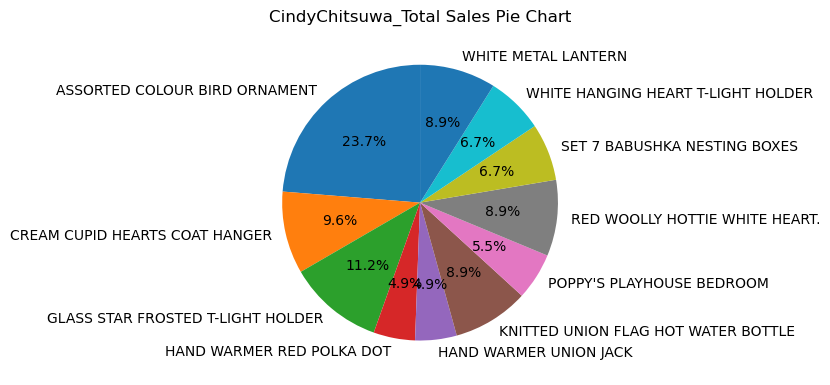

In [71]:
# ---------------------------
# Visualization 3: Pie Chart - Total Sales per Product
# ---------------------------

# Calculate total sales per row
top_ten['TotalSales'] = top_ten['Quantity'] * top_ten['UnitPrice']

# Group by product description and sum total sales
sales_by_product = top_ten.groupby('Description')['TotalSales'].sum()

# Plot the pie chart
plt.figure(figsize=(8,8))
sales_by_product.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Title and layout
plt.title('CindyChitsuwa_Total Sales Pie Chart')
plt.ylabel('')  
plt.tight_layout()

# Save the image 
plt.savefig('CindyChitsuwa_TotalSalesPieChart.png')
plt.show()

The box chart below shows the distribution of total sales per item, based on the quantity sold and unit price. It helps highlight how much revenue each product brought in and whether there are any outliers. Some items stand out by making a lot more money than others.

In [87]:
top_ten['TotalSales'] = top_ten['Quantity'] * top_ten['UnitPrice']

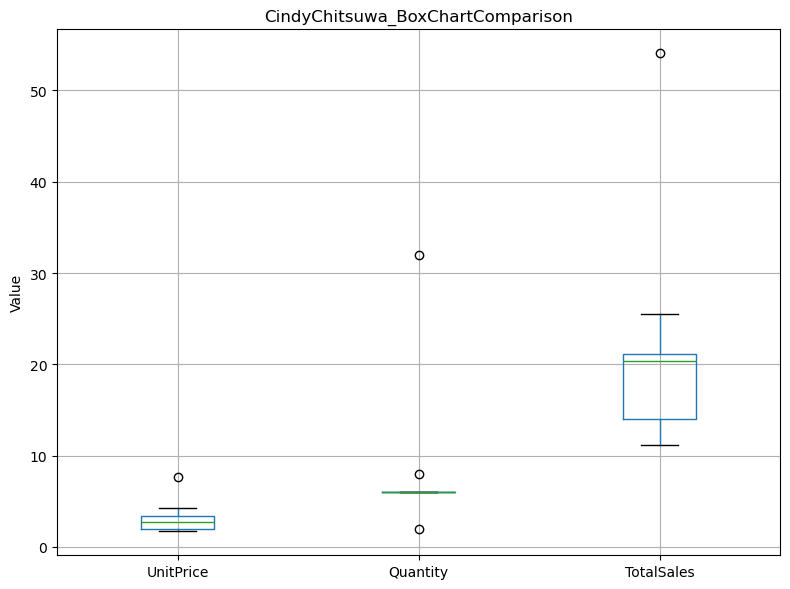

In [89]:
# ---------------------------
# Visualization 4: Box Chart - Price, Quantity, and Total Sales
# ---------------------------

top_ten['TotalSales'] = top_ten['Quantity'] * top_ten['UnitPrice']

# Plot all three columns 
plt.figure(figsize=(8,6))
top_ten[['UnitPrice', 'Quantity', 'TotalSales']].boxplot()

plt.title('CindyChitsuwa_ Box Chart Comparison')
plt.ylabel('Value')
plt.tight_layout()

# Save 
plt.savefig('CindyChitsuwa_BoxChartComparison.png')
plt.show()